In [1]:
%matplotlib inline

import pandas,os

#this method will add path to data folder

path      = lambda  fp,name ='': './data/{0}/{1}'.format(*[fp,name])


#this method will extract any file with .h5 extension in a given folder of data
H5        = lambda  fp : [
                            path( 
                                fp   = fp,
                                name = name )
                                for name in os.listdir(path(fp=fp))
                                if name.split('.')[-1] == 'h5'
                          ]

#new york coordinates are within the following boundaries
lon_bnd   = [-75.,-71.]
lat_bnd   = [39.,42]
boundaryQ = '(@lon_bnd[0]<pickup_longitude<@lon_bnd[1]) and (@lat_bnd[0]<pickup_latitude<@lat_bnd[1])'

In [2]:
Traf     = pandas.concat(map( lambda name : pandas.read_hdf(
           name,
    key  = 'table')
           ,H5('traffic')
           )).query(boundaryQ).reset_index(drop=True)

In [3]:
lLobj    =  ['pickup_latitude','pickup_longitude']
Traf     = Traf.round({x:1 for x in lLobj}).groupby(
            lLobj
            ).key.sum().to_frame().assign(
 traffic = lambda DF : (DF.key-DF.key.min())/(DF.key.max()-DF.key.min())
            ).reset_index().rename(
 columns = {'key':'traffic_count'}).assign(
  geokey = lambda DF : DF.pickup_latitude.astype(str)+DF.pickup_longitude.astype(str)
            ).drop(lLobj,axis=1)


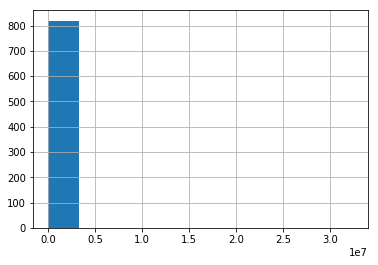

In [4]:
Traf.traffic_count.hist()

In [7]:
pandas.read_csv('./data/us.csv').query('state_id=="NY"'
                                      ).drop_duplicates('zips').round(
    {'lat':1,'lng':1}).groupby(['lat','lng']).sum().reset_index().assign(
    
               geokey = lambda DF : DF.lat.astype(str)+DF.lng.astype(str)
    ).merge(
    
    Traf,
    
    how='left', on = 'geokey').to_hdf(
            path('','traffic_summary.h5'),
       key='table',
     index=None)